# UHCR detection
Author: Pragati Mitra and Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
from ROOT import *
import numpy as np
from array import array
import glob

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Data input

In [3]:
# Input files to consider

# allfiles= glob.glob('uhcr_*.dat')

allfiles = ['uhcr_1.dat','uhcr_2.dat','uhcr_3.dat','uhcr_4.dat','uhcr_5.dat','uhcr_6.dat']

print(len(allfiles),' input data files available')

# select one of the files for analysis 

myfile = allfiles[0]

print ('Reading input file ',myfile)
data= np.loadtxt(myfile,skiprows=1)

npos = data[:,0].size

# Access data columns

x_pos=array('d',data[:,0])    # antenna position x (m)
y_pos=array('d',data[:,1])    # antenna position y (m)
t_peak=array('d',1000000*data[:,2])   # pulse peak time (s) - convert to micro seconds
a_peak=array('d',data[:,3])   # pulse peak amplitude (micro-volt)
    
print (npos,' measurement points read')

6  input data files available
Reading input file  uhcr_1.dat
176  measurement points read


### (3) Plot input file data

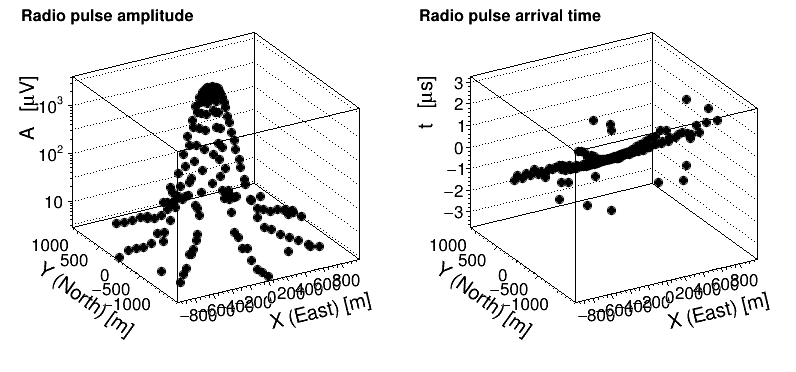

Info in <TCanvas::Print>: png file shprofile.png has been created


In [4]:
# Create 2D graph of measured pulse amplitudes

agr = TGraph2D("agr","Radio pulse amplitude",npos,x_pos,y_pos,a_peak)

# Create 2D graph of measured pulse arrival times

tgr = TGraph2D("tgr","Radio pulse arrival time",npos,x_pos,y_pos,t_peak)

# Set graph options

agr.SetMarkerStyle(20)
agr.GetXaxis().SetTitle("X (East) [m]")
agr.GetYaxis().SetTitle("Y (North) [m]")
agr.GetZaxis().SetTitle("A   [#muV]")
agr.GetXaxis().SetTitleOffset(1.5)
agr.GetYaxis().SetTitleOffset(1.8)

tgr.SetMarkerStyle(20)
tgr.GetXaxis().SetTitle("X (East) [m]")
tgr.GetYaxis().SetTitle("Y (North) [m]")
tgr.GetZaxis().SetTitle("t   [#mus]")
tgr.GetXaxis().SetTitleOffset(1.5)
tgr.GetYaxis().SetTitleOffset(1.8)

# Plot shower profiles

csh = TCanvas("csh","UHCR profile",800,400)
csh.Divide(2,1)

csh.cd(1)
agr.Draw("P")

# Log scale for amplitude ?
csh.GetPad(1).SetLogz(1)

csh.cd(2)
tgr.Draw("P")

csh.Update()
csh.Print('shprofile.png')

Image(filename='shprofile.png')

### (4) Fit shower profile

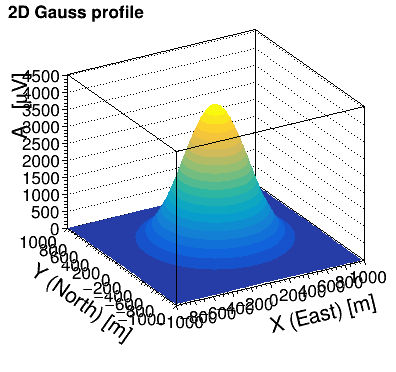

Info in <TCanvas::Print>: png file fprof.png has been created


In [5]:
# Define 2D shower profile (2D Gauss distribution)

def shprof(x,par):
    x0   = par[0]
    y0   = par[1]
    sig_x = par[2]
    sig_y = par[3]
    rho   = par[4]
    amp   = par[5]
    
    dx = x[0] - x0
    dy = x[1] - y0
    
    arg = dx*dx/sig_x/sig_x + dy*dy/sig_y/sig_y - 2*rho*dx*dy/sig_x/sig_y
    
    return amp*exp(-0.5*arg/(1-rho*rho))

fprof=TF2("fprof",shprof,-1000.,1000.,-1000.,1000.,6)

fprof.SetTitle("2D Gauss profile")

# Initialize function parameters

fprof.SetParameter(0,0.)    
fprof.SetParameter(1,0.) 
fprof.SetParameter(2,300.)    
fprof.SetParameter(3,300.) 
fprof.SetParameter(4,0.)    
fprof.SetParameter(5,np.max(a_peak)) 

fprof.SetNpx(100)
fprof.SetNpy(100)

fprof.GetXaxis().SetTitle("X (East) [m]")
fprof.GetYaxis().SetTitle("Y (North) [m]")
fprof.GetZaxis().SetTitle("A   [#muV]")
fprof.GetXaxis().SetTitleOffset(1.5)
fprof.GetYaxis().SetTitleOffset(1.8)

# Draw function (for test)

csh2 = TCanvas('csh2',"Shower profile",400,400)

fprof.Draw("surf2")

csh2.Update()
csh2.Print('fprof.png')

Image(filename='fprof.png')

Position of the shower axis:  13.392430808334119  m (W->E),  -6.439224578328368  m (S->N)


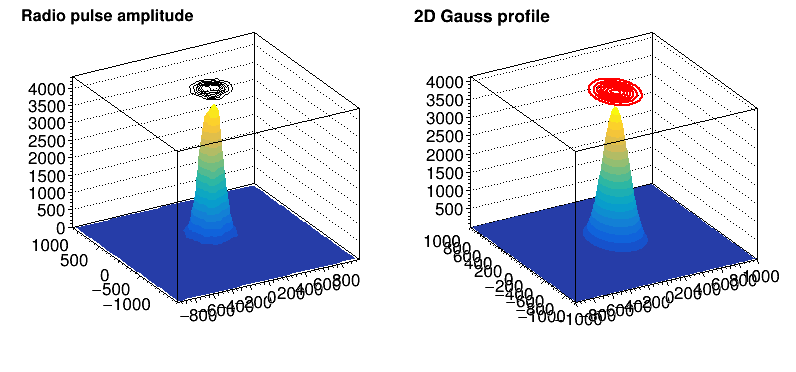


****************************************
Minimizer is Minuit / Migrad
Chi2                      =  1.47196e+07
NDf                       =          170
Edm                       =  2.57894e-08
NCalls                    =          276
p0                        =      13.3924   +/-   3.48567     
p1                        =     -6.43922   +/-   4.83246     
p2                        =      116.645   +/-   3.7363      
p3                        =      158.748   +/-   5.16231     
p4                        =    0.0318497   +/-   0.0498984   
p5                        =      3746.39   +/-   54.321      


Info in <TCanvas::Print>: png file fitprof.png has been created


In [6]:
# Fit profile to 2D graph

agr.Fit(fprof)

# Extract fit results

x0 = fprof.GetParameter(0)
y0 = fprof.GetParameter(1)

print("Position of the shower axis: ",x0," m (W->E), ",y0," m (S->N)")

# Draw data (interpolated) and fitted function 

csh3 = TCanvas('csh3',"Shower profile fit",800,400)

csh3.Divide(2,1)
csh3.cd(1)

agr.Draw("surf7")
# csh3.GetPad(1).SetLogz(1)

csh3.cd(2)
fprof.Draw("surf7")
fprof.SetMinimum(0.3)
# csh3.GetPad(2).SetLogz(1)

csh3.Update()
csh3.Print('fitprof.png')

Image(filename='fitprof.png')

### (5) Plot radial profile

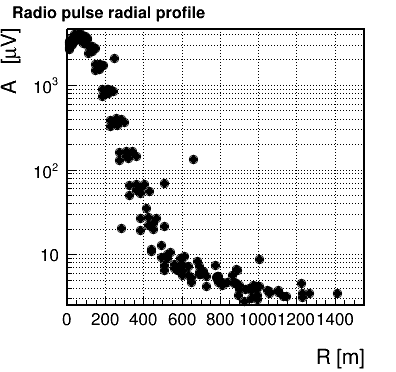

Warning in <TCanvas::Constructor>: Deleting canvas with same name: csh
Info in <TCanvas::Print>: png file rprofile.png has been created


In [7]:
# Calculate distance from shower axis

r_pos =  array('d',np.sqrt(np.array(x_pos)**2+np.array(y_pos)**2))

# Create radial profile

rgr = TGraph(npos,r_pos,a_peak)

# Set graph options

rgr.SetNameTitle("rgr","Radio pulse radial profile")
rgr.SetMarkerStyle(20)
rgr.GetXaxis().SetTitle("R [m]")
rgr.GetYaxis().SetTitle("A   [#muV]")
rgr.GetXaxis().SetTitleOffset(1.5)
rgr.GetYaxis().SetTitleOffset(1.5)

# Plot shower profiles

gStyle.SetOptLogy(1)
csh4 = TCanvas("csh","UHCR profile",400,400)

rgr.Draw("AWP")

csh4.Update()
csh4.Print('rprofile.png')
gStyle.SetOptLogy(0)

Image(filename='rprofile.png')
    